# UniRef90 - UniProt mapping Dataset Analysis


In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)
from ast import literal_eval


In [3]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [4]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

In [5]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_uniprot_hosts_pruned_metadata_species_vertebrates_w_seq_wo_multi_host_seq.csv")

In [11]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [7]:
print("df size = ", df.shape)
df.head()

df size =  (343108, 8)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_L0BZH8,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTVKIGGQXXEALLDTGADDTVLEDINLPGKWKPXM...
1,UniRef90_L0BZI0,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEDMSLPGRWKPKM...
2,UniRef90_L0BZI1,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELENEGKISKIGPENPYNTPVFAIKKKNSTKWRKVVDFRELNKRTQ...
3,UniRef90_L0BZI3,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPIVTIKVGGQLKEALLDTGADDTVLEEMXLPGXWKPKM...
4,UniRef90_L0BZI5,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELEKEGKISKIGPENPYNTPIFAIKKKNSXKWRKXVDFRELNKRTQ...


In [8]:
column_stats(df, "virus_name")

Number of unique values = 235
                                            virus_name  virus_name_count  virus_name_percent
0                       Human immunodeficiency virus 1            318863           92.933712
1                                    Hepatitis B virus             13895            4.049745
2                        Simian immunodeficiency virus              2004            0.584073
3                       Human immunodeficiency virus 2              1599            0.466034
4                            African swine fever virus              1150            0.335171
5                              Paslahepevirus balayani               813            0.236952
6                                Hepatitis delta virus               562            0.163797
7                                            Orf virus               323            0.094139
8                                         Cowpox virus               285            0.083064
9                             Mammarenav

In [9]:
column_stats(df, "virus_host_name")

Number of unique values = 90
             virus_host_name  virus_host_name_count  virus_host_name_percent
0               Homo sapiens                 336408                98.047262
1            Pan troglodytes                   2007                 0.584947
2   Phacochoerus aethiopicus                   1044                 0.304277
3      Bandicota bengalensis                    812                 0.236660
4                 Sus scrofa                    630                 0.183616
5               Capra hircus                    448                 0.130571
6                 Bos taurus                    309                 0.090059
7        Apodemus sylvaticus                    279                 0.081316
8              Procyon lotor                     95                 0.027688
9          Cynomys gunnisoni                     89                 0.025939
10     Oryctolagus cuniculus                     77                 0.022442
11     Dryophytes versicolor                   

min seq len = 11
max seq len = 7217


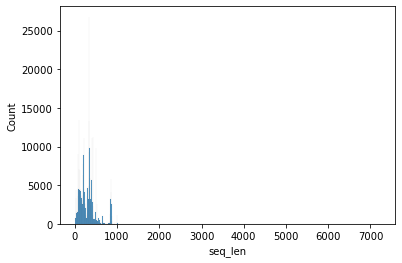

     start     end   count  percentage
0     11.0   611.5  318006   92.683936
1    611.5  1212.0   24686    7.194819
2   1212.0  1812.5     168    0.048964
3   1812.5  2413.0     159    0.046341
4   2413.0  3013.5      45    0.013115
5   3013.5  3614.0      14    0.004080
6   3614.0  4214.5      16    0.004663
7   4214.5  4815.0       8    0.002332
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001749


In [12]:
print_seq_len_histogram(df, n_bins=12)